In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv


In [2]:
data=pd.read_csv("/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv")
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [3]:
data=data.drop(["PatientID","DoctorInCharge"],axis=1)
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [4]:
data.isnull().sum()

Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
p=data.columns[:-1]
print(len(p))

32


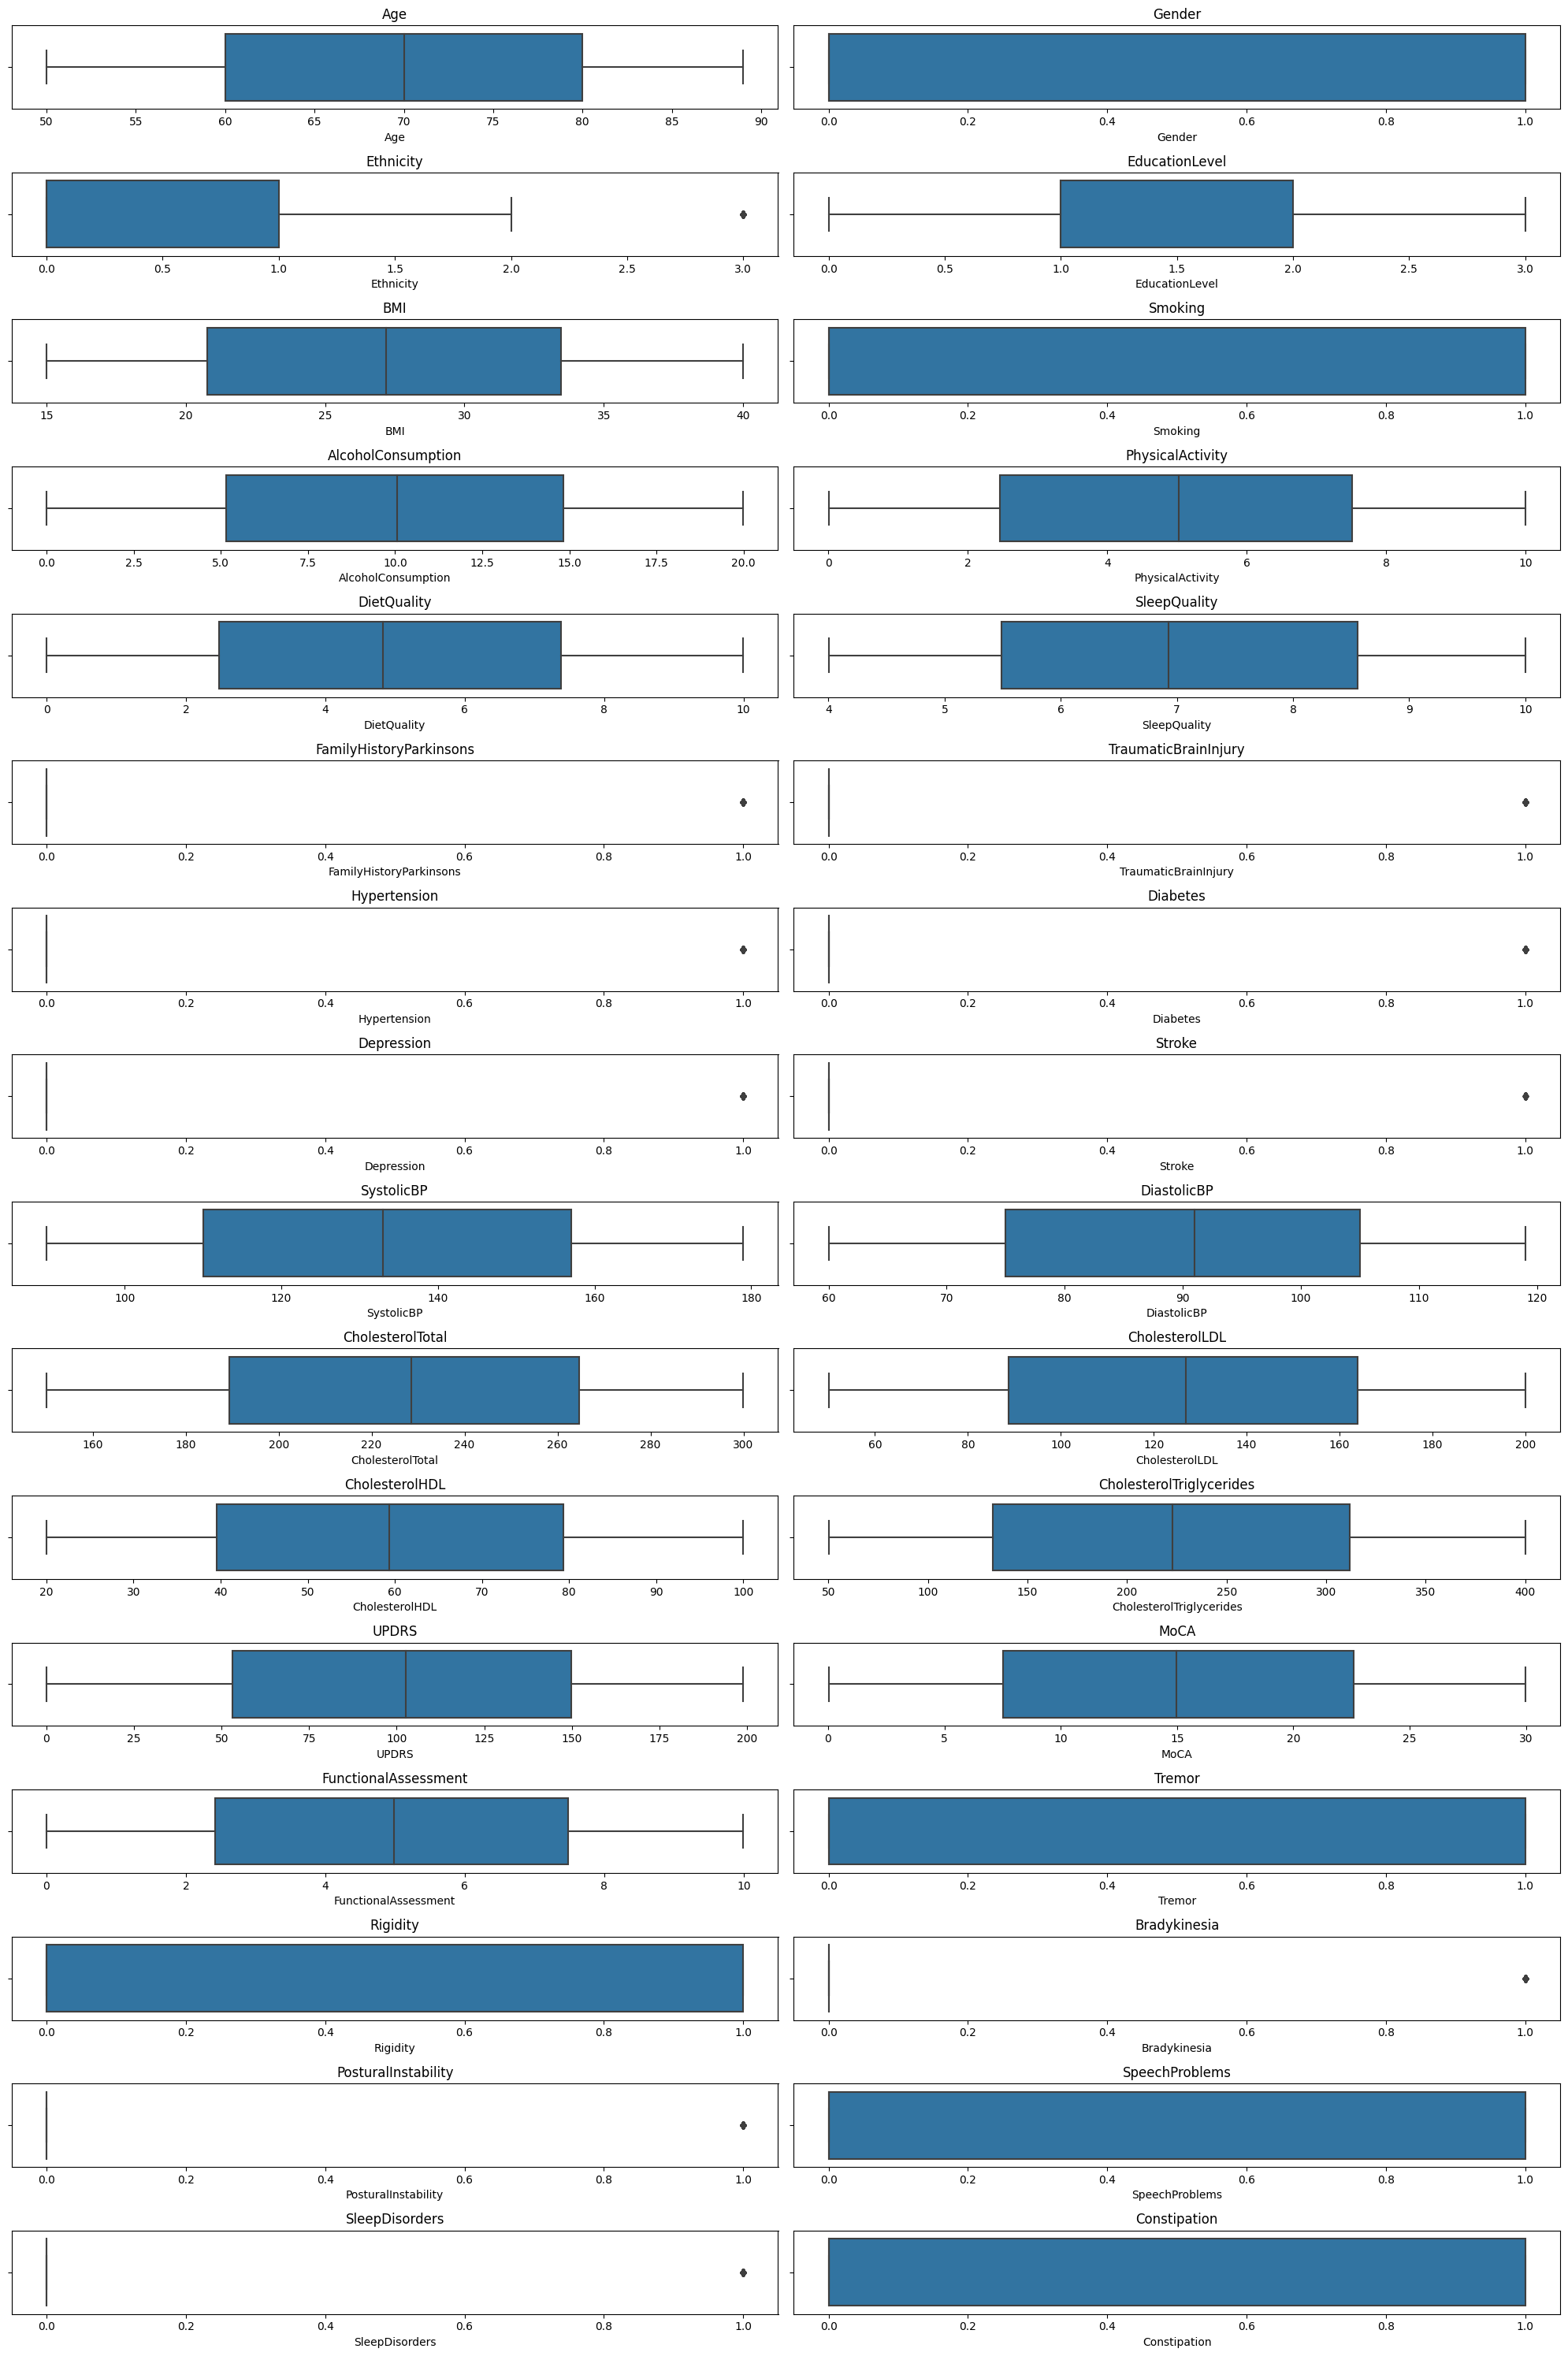

In [7]:
fig,axes=plt.subplots(nrows=16,ncols=2,figsize=(20,30))
for i,col in enumerate(p):
    ax=axes[i//2,i%2]
    sns.boxplot(x=data[col],ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [8]:
def check_how_many(col):
    ones=0
    for i in data[col]:
        if i==1:
            ones+=1
    print("Ones= ",ones,"     Zeroes= ",2105-ones)

In [9]:
for i in p:
    if len(data[i].unique())==2:
        print(i)
        check_how_many(i)

Gender
Ones=  1037      Zeroes=  1068
Smoking
Ones=  624      Zeroes=  1481
FamilyHistoryParkinsons
Ones=  307      Zeroes=  1798
TraumaticBrainInjury
Ones=  224      Zeroes=  1881
Hypertension
Ones=  307      Zeroes=  1798
Diabetes
Ones=  312      Zeroes=  1793
Depression
Ones=  432      Zeroes=  1673
Stroke
Ones=  103      Zeroes=  2002
Tremor
Ones=  909      Zeroes=  1196
Rigidity
Ones=  532      Zeroes=  1573
Bradykinesia
Ones=  437      Zeroes=  1668
PosturalInstability
Ones=  292      Zeroes=  1813
SpeechProblems
Ones=  621      Zeroes=  1484
SleepDisorders
Ones=  516      Zeroes=  1589
Constipation
Ones=  625      Zeroes=  1480


In [10]:
print("Diagnosis")
check_how_many("Diagnosis")

Diagnosis
Ones=  1304      Zeroes=  801


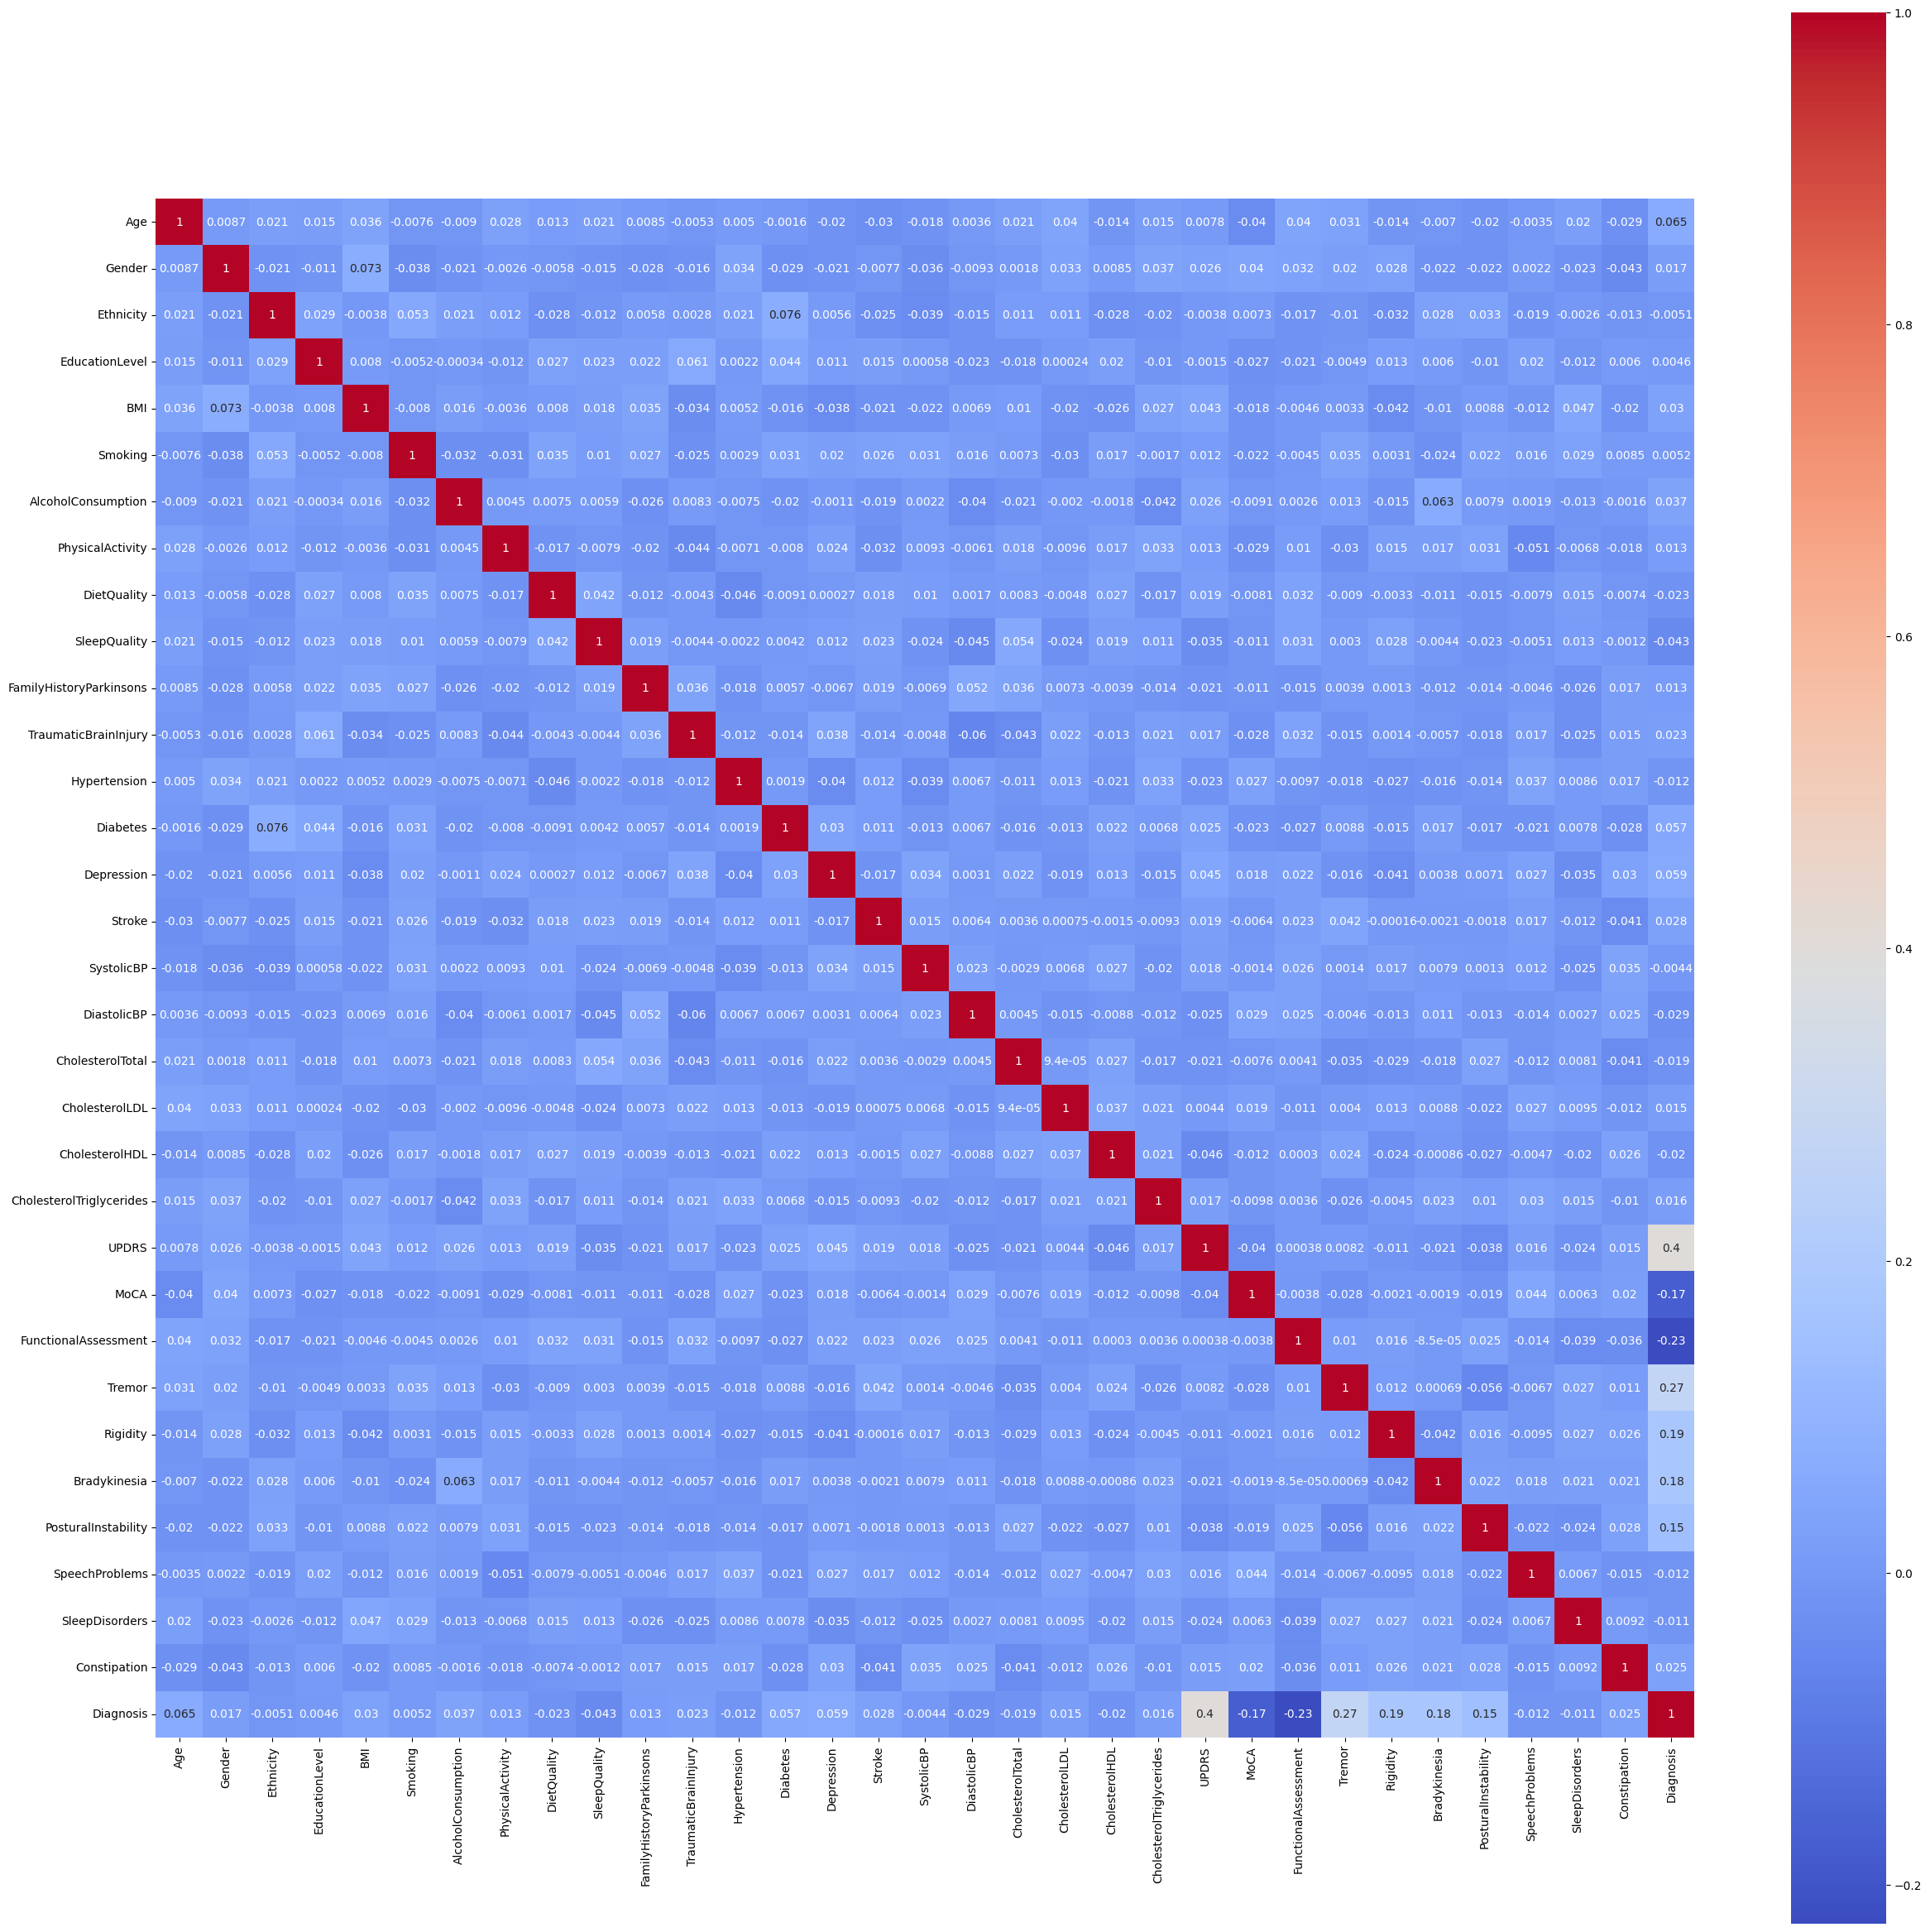

In [11]:
correlation_matrix=data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix,annot=True,square=True,cmap="coolwarm")
plt.show()

In [12]:
results={}

# **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
x=data.drop(["Diagnosis"],axis=1)
y=data["Diagnosis"]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)

In [16]:
RandomForestModel=RandomForestClassifier()

In [17]:
RandomForestModel.fit(X_train,Y_train)

RandomForestClassifier()

In [18]:
FeatureImportance=RandomForestModel.feature_importances_

In [19]:
d={}
for i in range(len(p)):
   d[p[i]]=FeatureImportance[i]

In [20]:
d=sorted(d.items(),key=lambda x:x[1],reverse=True)
for i in d:
    print(i)

('UPDRS', 0.23621504761882878)
('FunctionalAssessment', 0.10149511797362615)
('MoCA', 0.0753913536374453)
('Tremor', 0.07124067622326205)
('Age', 0.0351707048733646)
('PhysicalActivity', 0.03307773918209779)
('Bradykinesia', 0.032524974621126274)
('CholesterolLDL', 0.030566386913574176)
('SleepQuality', 0.030511234694426435)
('Rigidity', 0.030153592815167017)
('SystolicBP', 0.03004893758658915)
('CholesterolHDL', 0.029955113783007727)
('CholesterolTotal', 0.02984939640057366)
('BMI', 0.029818194624077664)
('DietQuality', 0.0297675354861414)
('AlcoholConsumption', 0.029176437536089356)
('CholesterolTriglycerides', 0.0287062014171647)
('DiastolicBP', 0.027091023517389526)
('PosturalInstability', 0.023420469278618728)
('EducationLevel', 0.010311340430356053)
('Ethnicity', 0.008452617985097381)
('Depression', 0.006377018681092893)
('SleepDisorders', 0.005962902805994292)
('Smoking', 0.004983552151880063)
('Gender', 0.0046191964257885024)
('SpeechProblems', 0.004295470440744089)
('Constipat

In [21]:
Y_randomforest_prediction=RandomForestModel.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [23]:
print("Confusion Matrix:",confusion_matrix(Y_test,Y_randomforest_prediction))
print("Accuracy: ",accuracy_score(Y_test,Y_randomforest_prediction))
results["Random Forest"]=[accuracy_score(Y_test,Y_randomforest_prediction),precision_score(Y_test,Y_randomforest_prediction),recall_score(Y_test,Y_randomforest_prediction),f1_score(Y_test,Y_randomforest_prediction)]

Confusion Matrix: [[138  24]
 [ 10 249]]
Accuracy:  0.9192399049881235


# **XGBoost**

In [24]:
import xgboost as xgb

In [25]:
xgb_classifier=xgb.XGBClassifier()
xgb_classifier.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
Y_pred_using_xgb=xgb_classifier.predict(X_test)
print("Confusion Matrix:",confusion_matrix(Y_test,Y_pred_using_xgb))
print("Accuracy: ",accuracy_score(Y_test,Y_pred_using_xgb))

Confusion Matrix: [[147  15]
 [ 12 247]]
Accuracy:  0.9358669833729216


In [27]:
results["XGB"]=[accuracy_score(Y_test,Y_pred_using_xgb),precision_score(Y_test,Y_pred_using_xgb),recall_score(Y_test,Y_pred_using_xgb),f1_score(Y_test,Y_pred_using_xgb)]

# **Adaboost**

In [28]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=80,learning_rate=1.5)

In [29]:
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1.5, n_estimators=80)

In [30]:
Y_adaboost_pred=adaboost.predict(X_test)

In [31]:
print("Confusion Matrix:",confusion_matrix(Y_test,Y_adaboost_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_adaboost_pred))

Confusion Matrix: [[144  18]
 [ 20 239]]
Accuracy:  0.9097387173396675


In [32]:
results["ADABOOST"]=[accuracy_score(Y_test,Y_adaboost_pred),precision_score(Y_test,Y_adaboost_pred),recall_score(Y_test,Y_adaboost_pred),f1_score(Y_test,Y_adaboost_pred)]

In [33]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.5,
 'n_estimators': 80,
 'random_state': None}

# **CATBoost**

In [34]:
from catboost import CatBoostClassifier
catboost=CatBoostClassifier()

In [35]:
catboost.fit(X_train,Y_train)

Learning rate set to 0.01287
0:	learn: 0.6824513	total: 54.6ms	remaining: 54.5s
1:	learn: 0.6709966	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6621317	total: 59.7ms	remaining: 19.8s
3:	learn: 0.6525722	total: 62.2ms	remaining: 15.5s
4:	learn: 0.6460178	total: 64.7ms	remaining: 12.9s
5:	learn: 0.6335602	total: 67.2ms	remaining: 11.1s
6:	learn: 0.6248491	total: 69.6ms	remaining: 9.88s
7:	learn: 0.6173103	total: 72ms	remaining: 8.93s
8:	learn: 0.6100072	total: 74.6ms	remaining: 8.21s
9:	learn: 0.6015636	total: 77ms	remaining: 7.62s
10:	learn: 0.5922773	total: 79.3ms	remaining: 7.13s
11:	learn: 0.5828017	total: 81.7ms	remaining: 6.73s
12:	learn: 0.5739934	total: 84.2ms	remaining: 6.39s
13:	learn: 0.5669827	total: 86.6ms	remaining: 6.1s
14:	learn: 0.5583495	total: 89.1ms	remaining: 5.85s
15:	learn: 0.5510363	total: 91.5ms	remaining: 5.63s
16:	learn: 0.5418065	total: 94.1ms	remaining: 5.44s
17:	learn: 0.5340853	total: 96.5ms	remaining: 5.27s
18:	learn: 0.5262057	total: 99.1ms	remaining: 5.11

In [36]:
Y_cat_pred=catboost.predict(X_test)

In [37]:
print("Confusion Matrix:",confusion_matrix(Y_test,Y_cat_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_cat_pred))

Confusion Matrix: [[148  14]
 [  8 251]]
Accuracy:  0.9477434679334917


In [38]:
results["CATBOOST"]=[accuracy_score(Y_test,Y_cat_pred),precision_score(Y_test,Y_cat_pred),recall_score(Y_test,Y_cat_pred),f1_score(Y_test,Y_cat_pred)]

<Axes: >

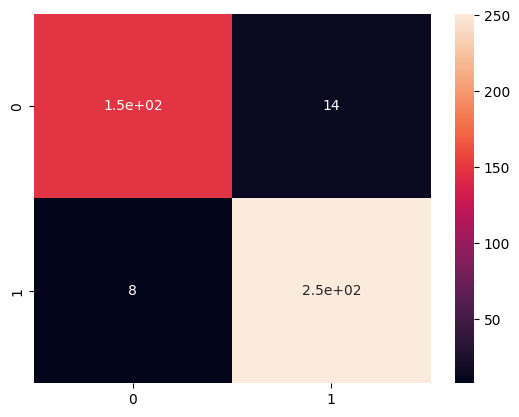

In [39]:
sns.heatmap(confusion_matrix(Y_test,Y_cat_pred),annot=True)

# **LIGHTGBM**

In [40]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier()

In [41]:
lgbm.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 1045, number of negative: 639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 1684, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620546 -> initscore=0.491868
[LightGBM] [Info] Start training from score 0.491868


LGBMClassifier()

In [42]:
Y_lgbm_pred=lgbm.predict(X_test)

In [43]:
print("Confusion Matrix:",confusion_matrix(Y_test,Y_lgbm_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_lgbm_pred))

Confusion Matrix: [[145  17]
 [ 10 249]]
Accuracy:  0.9358669833729216


In [44]:
results["LIGHTGBM"]=[accuracy_score(Y_test,Y_lgbm_pred),precision_score(Y_test,Y_lgbm_pred),recall_score(Y_test,Y_lgbm_pred),f1_score(Y_test,Y_lgbm_pred)]

<Axes: >

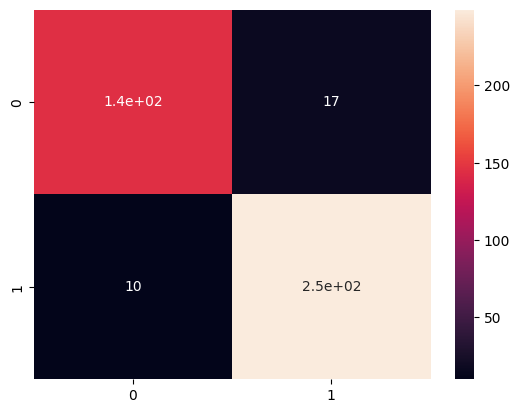

In [45]:
sns.heatmap(confusion_matrix(Y_test,Y_lgbm_pred),annot=True)

# **Logistic**

In [46]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [47]:
logistic.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
Y_logistic_pred=logistic.predict(X_test)

In [49]:
print("Confusion Matrix:",confusion_matrix(Y_test,Y_logistic_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_logistic_pred))

Confusion Matrix: [[113  49]
 [ 38 221]]
Accuracy:  0.7933491686460807


In [50]:
results["Logistic"]=[accuracy_score(Y_test,Y_logistic_pred),precision_score(Y_test,Y_logistic_pred),recall_score(Y_test,Y_logistic_pred),f1_score(Y_test,Y_logistic_pred)]

<Axes: >

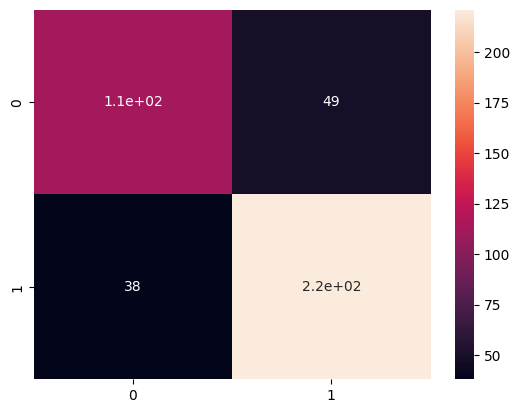

In [51]:
sns.heatmap(confusion_matrix(Y_test,Y_logistic_pred),annot=True)

# **SVM**

In [52]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [53]:
svm.fit(X_train,Y_train)

SVC()

In [54]:
Y_SVC_pred=svm.predict(X_test)

In [55]:
print("Confusion Matrix:",confusion_matrix(Y_test,Y_SVC_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_SVC_pred))

Confusion Matrix: [[ 80  82]
 [ 23 236]]
Accuracy:  0.7505938242280285


In [56]:
results["SVM"]=[accuracy_score(Y_test,Y_SVC_pred),precision_score(Y_test,Y_SVC_pred),recall_score(Y_test,Y_SVC_pred),f1_score(Y_test,Y_SVC_pred)]

# **Hyperparameter Tuning for xgbboost**

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {
    'learning_rate': [0.1, 0.5, 1,0.01,0.0001],
    'max_depth': [i for i in range(1,11)],
    'gamma': [0, 0.1, 0.5],
    'n_estimators': [i for i in range(50,101,10)]
}

In [59]:
grid_search_xgb=GridSearchCV(xgb.XGBClassifier(),param_grid=param_grid,cv=5,scoring="accuracy")

In [60]:
grid_search_xgb.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.5],
                         'learning_rate': [0.1, 0.5, 1, 0.01, 0.0001],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [61]:
print("Parameters:",grid_search_xgb.best_params_)
print("Best Score:",grid_search_xgb.best_score_)

Parameters: {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 50}
Best Score: 0.9477444538646319


In [62]:
Y_grid_search_xgb_pred=grid_search_xgb.predict(X_test)

<Axes: >

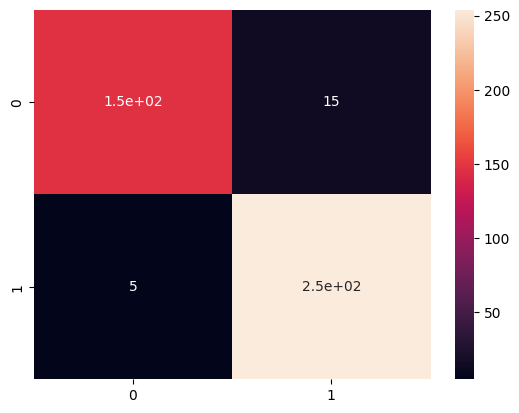

In [63]:
sns.heatmap(confusion_matrix(Y_test,Y_grid_search_xgb_pred),annot=True)

In [64]:
results["XGB Tuning"]=[accuracy_score(Y_test,Y_grid_search_xgb_pred),precision_score(Y_test,Y_grid_search_xgb_pred),recall_score(Y_test,Y_grid_search_xgb_pred),f1_score(Y_test,Y_grid_search_xgb_pred)]

# **Hyper Parameter Tuning for svm**

In [65]:
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto']
# }

In [66]:
# grid_search_SVM=GridSearchCV(estimator=SVC(),cv=5,param_grid=param_grid)

In [67]:
# grid_search_SVM.fit(X_train,Y_train)
# Y_grid_search_svm_pred=grid_search_xgb.predict(X_test)
# sns.heatmap(confusion_matrix(Y_test,Y_grid_search_svm_pred),annot=True)
# results["SVM Tuning"]=[accuracy_score(Y_test,Y_grid_search_svm_pred),precision_score(Y_test,Y_grid_search_svm_pred),recall_score(Y_test,Y_grid_search_svm_pred),f1_score(Y_test,Y_grid_search_svm_pred)]

In [68]:
df=pd.DataFrame(results)
df=df.T
df.columns=["Accuracy","Precision","Recall","F1-Score"]
df

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.919240,0.912088,0.961390,0.936090
XGB,0.935867,0.942748,0.953668,0.948177
ADABOOST,0.909739,0.929961,0.922780,0.926357
CATBOOST,0.947743,0.947170,0.969112,0.958015
LIGHTGBM,0.935867,0.936090,0.961390,0.948571
Logistic,0.793349,0.818519,0.853282,0.835539
SVM,0.750594,0.742138,0.911197,0.818024
XGB Tuning,0.952494,0.944238,0.980695,0.962121


In [69]:
p.shape

(32,)

In [85]:
ahsfjlhs='''import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_shap_explainer(X_train, X_test, feature_names, model):
    """
    Create and run SHAP explanations for the XGBoost model
    
    Parameters:
    X_train: Training data
    X_test: Test data
    feature_names: List of feature names
    model: Trained GridSearchCV XGBoost model
    """
    # Get the best model from GridSearchCV
    best_model = model.best_estimator_
    
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values for test set
    shap_values = explainer.shap_values(X_test)
    
    # Create visualizations
    
    # 1. Summary Plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    plt.title("SHAP Summary Plot")
    plt.tight_layout()
    plt.show()
    
    # 2. Bar Plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")
    plt.title("SHAP Feature Importance")
    plt.tight_layout()
    plt.show()
    
    # 3. Generate dependency plots for top features
    feature_importance = np.abs(shap_values).mean(0)
    top_features = np.argsort(feature_importance)[-5:]  # Top 5 features
    
    for feature_idx in top_features:
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(
            feature_idx, 
            shap_values, 
            X_test, 
            feature_names=feature_names
        )
        plt.title(f"SHAP Dependence Plot for {feature_names[feature_idx]}")
        plt.tight_layout()
        plt.show()
    
    # Calculate and print feature importance summary
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'SHAP_importance': np.abs(shap_values).mean(0)
    })
    feature_importance_df = feature_importance_df.sort_values('SHAP_importance', ascending=False)
    
    print("\nFeature Importance Summary (based on SHAP values):")
    print(feature_importance_df)
    
    return explainer, shap_values, feature_importance_df

def explain_instance_shap(instance_idx, explainer, shap_values, X_test, feature_names):
    """
    Generate detailed SHAP explanation for a specific instance
    
    Parameters:
    instance_idx: Index of the instance to explain
    explainer: Trained SHAP explainer
    shap_values: Pre-calculated SHAP values
    X_test: Test data
    feature_names: List of feature names
    """
    # Force plot for the instance
    plt.figure(figsize=(15, 3))
    shap.force_plot(
        explainer.expected_value,
        shap_values[instance_idx,:],
        X_test.iloc[instance_idx,:],
        feature_names=feature_names,
        matplotlib=True
    )
    plt.title(f"SHAP Force Plot for Instance {instance_idx}")
    plt.tight_layout()
    plt.show()
    
    # Print detailed feature contributions
    contributions = pd.DataFrame({
        'Feature': feature_names,
        'SHAP_value': shap_values[instance_idx,:]
    })
    contributions = contributions.sort_values('SHAP_value', key=abs, ascending=False)
    
    print(f"\nDetailed feature contributions for instance {instance_idx}:")
    print(contributions)
    
    return contributions

# Usage example:
feature_names = p  # Your feature names from data.columns[:-1]
shap_explainer, shap_values, feature_importance = create_shap_explainer(
    X_train, 
    X_test, 
    feature_names, 
    grid_search_xgb
)

# To explain a specific instance (example):
# instance_explanation = explain_instance_shap(0, shap_explainer, shap_values, X_test, feature_names)'''

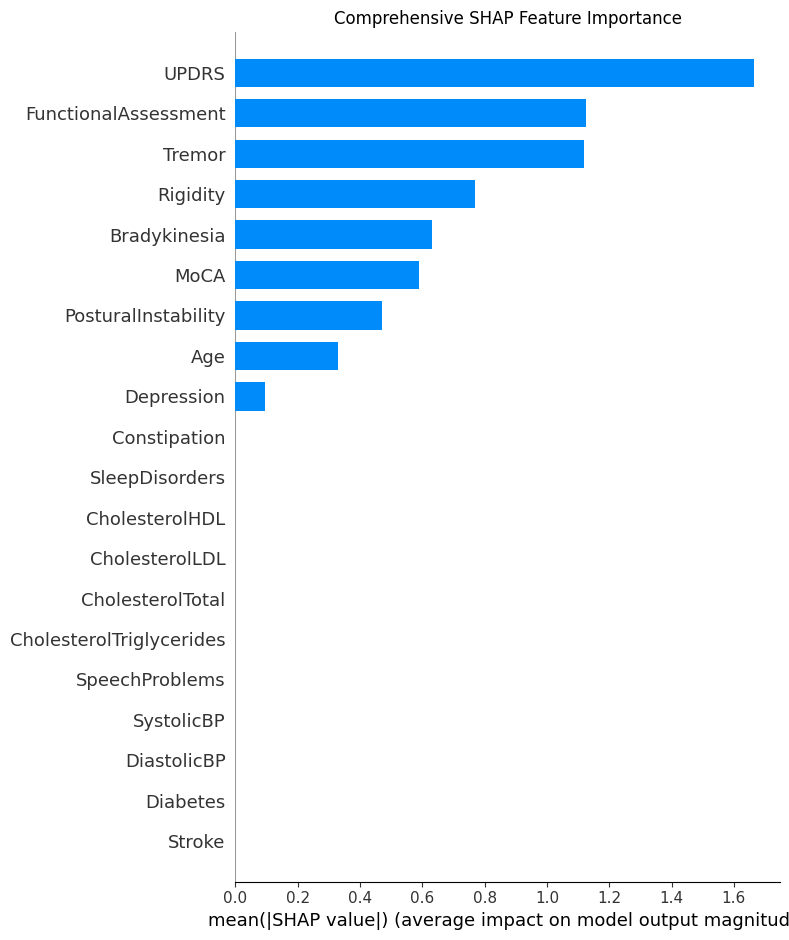

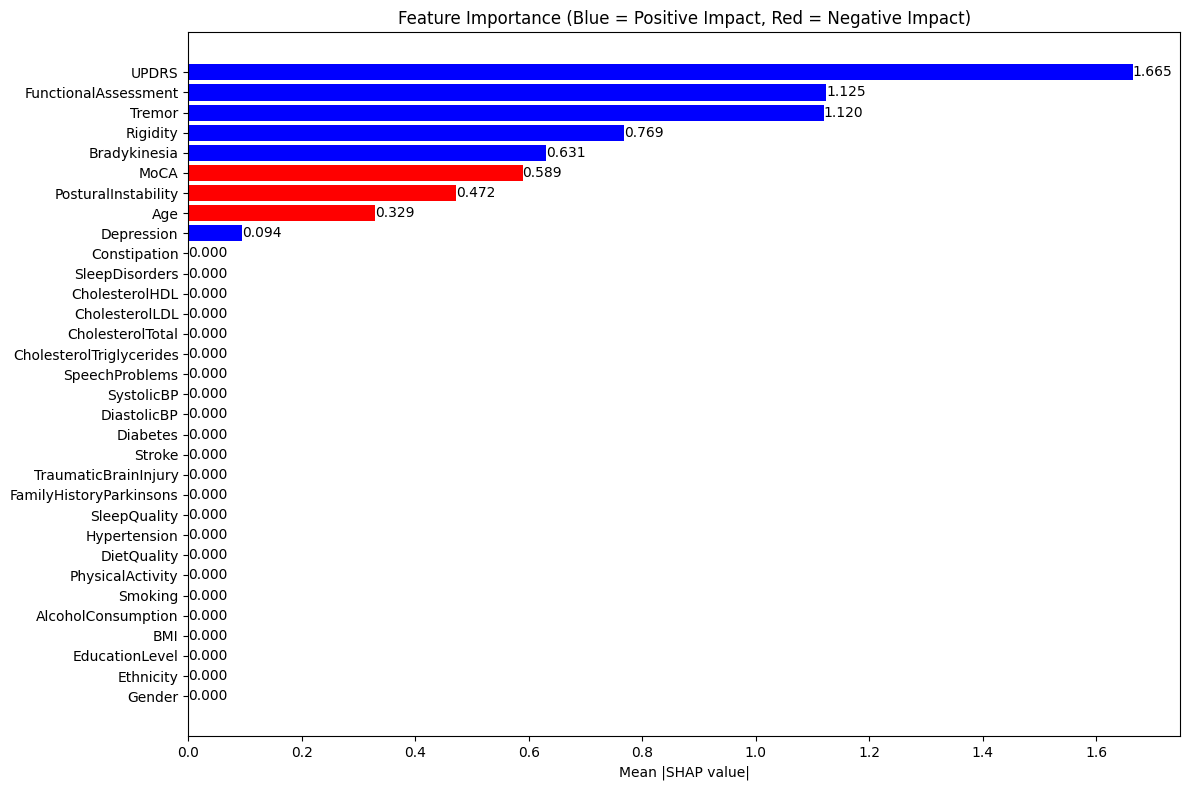

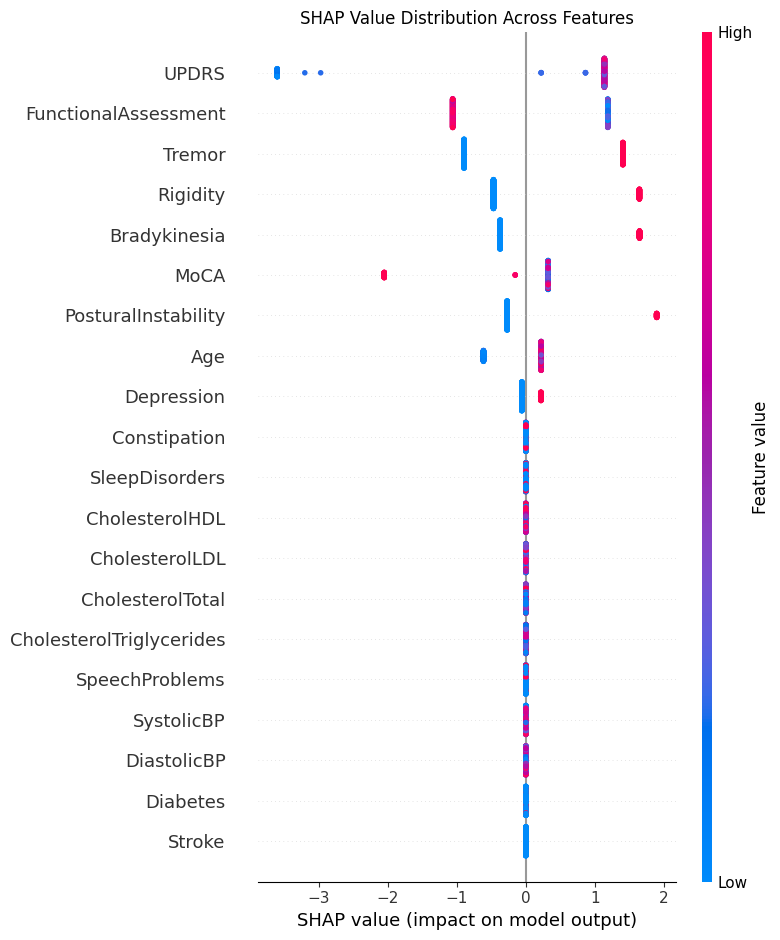


Detailed Feature Importance Summary:
                     Feature  Absolute_Importance  Directional_Impact  \
22                     UPDRS               1.6646              0.0935   
24      FunctionalAssessment               1.1245              0.0556   
25                    Tremor               1.1198              0.1106   
26                  Rigidity               0.7687              0.0684   
27              Bradykinesia               0.6309              0.0351   
23                      MoCA               0.5890             -0.0482   
28       PosturalInstability               0.4721             -0.0033   
0                        Age               0.3294             -0.0064   
14                Depression               0.0943              0.0046   
1                     Gender               0.0000              0.0000   
3             EducationLevel               0.0000              0.0000   
2                  Ethnicity               0.0000              0.0000   
6         Alc

invalid value encountered in divide
invalid value encountered in divide
Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


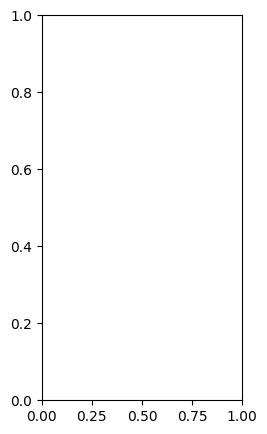

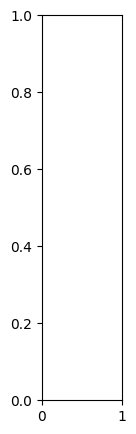

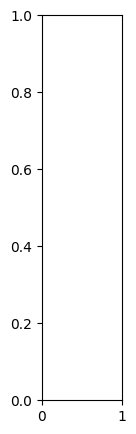

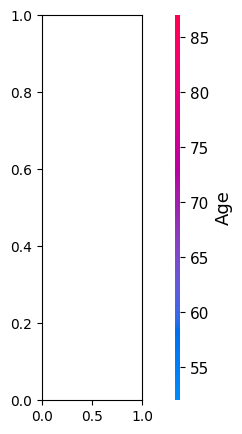

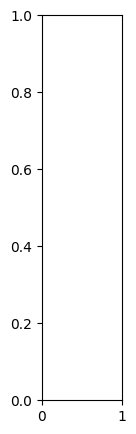

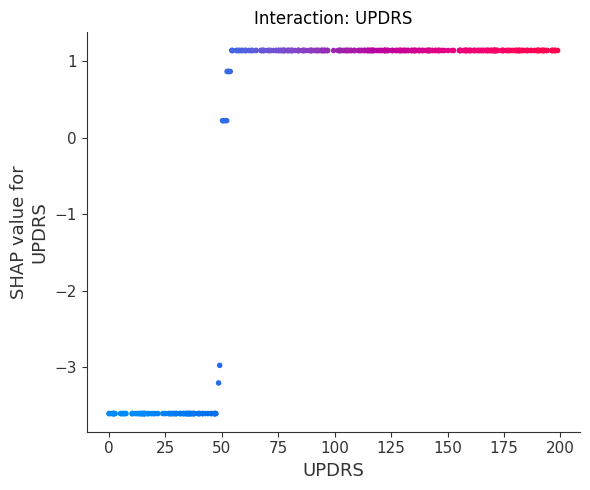

In [83]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_comprehensive_shap_analysis(X_train, X_test, feature_names, model):
    """
    Create comprehensive SHAP analysis with all feature importances in one plot
    
    Parameters:
    X_train: Training data
    X_test: Test data
    feature_names: List of feature names
    model: Trained GridSearchCV XGBoost model
    """
    # Get the best model from GridSearchCV
    best_model = model.best_estimator_
    
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values for test set
    shap_values = explainer.shap_values(X_test)
    
    # 1. Comprehensive Summary Plot (All features in one view)
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar",
                     show=False)
    plt.title("Comprehensive SHAP Feature Importance")
    plt.tight_layout()
    plt.show()
    
    # 2. Create detailed feature importance plot with both absolute and directional impact
    feature_importance = np.abs(shap_values).mean(0)
    feature_importance_signed = shap_values.mean(0)
    
    # Create DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Absolute_Importance': feature_importance,
        'Directional_Impact': feature_importance_signed
    })
    
    # Sort by absolute importance
    importance_df = importance_df.sort_values('Absolute_Importance', ascending=True)
    
    # Create color map based on directional impact
    colors = ['red' if x < 0 else 'blue' for x in importance_df['Directional_Impact']]
    
    # Create horizontal bar plot
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(importance_df)), importance_df['Absolute_Importance'], color=colors)
    plt.yticks(range(len(importance_df)), importance_df['Feature'])
    plt.xlabel('Mean |SHAP value|')
    plt.title('Feature Importance (Blue = Positive Impact, Red = Negative Impact)')
    
    # Add value labels
    for i, v in enumerate(importance_df['Absolute_Importance']):
        plt.text(v, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Create violin plot for detailed distribution of SHAP values
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
    plt.title("SHAP Value Distribution Across Features")
    plt.tight_layout()
    plt.show()
    
    # Print detailed feature importance summary
    print("\nDetailed Feature Importance Summary:")
    importance_summary = importance_df.copy()
    importance_summary['Average_Impact'] = importance_summary['Directional_Impact']
    importance_summary = importance_summary.sort_values('Absolute_Importance', ascending=False)
    print(importance_summary.round(4))
    
    # Calculate feature importance percentiles
    importance_summary['Importance_Percentile'] = importance_summary['Absolute_Importance'].rank(pct=True) * 100
    
    print("\nFeature Importance Percentiles:")
    print(importance_summary[['Feature', 'Importance_Percentile']].round(2))
    
    return explainer, shap_values, importance_summary

def create_feature_interaction_plot(shap_values, X_test, feature_names, top_n=5):
    """
    Create interaction plot for top features
    
    Parameters:
    shap_values: Calculated SHAP values
    X_test: Test data
    feature_names: List of feature names
    top_n: Number of top features to show interactions for
    """
    # Get top features by importance
    feature_importance = np.abs(shap_values).mean(0)
    top_features_idx = np.argsort(feature_importance)[-top_n:]
    
    # Create interaction plot
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(top_features_idx):
        plt.subplot(1, top_n, i+1)
        shap.dependence_plot(idx, shap_values, X_test, feature_names=feature_names,
                           show=False)
        plt.title(f"Interaction: {feature_names[idx]}")
    
    plt.tight_layout()
    plt.show()

# Usage example:
feature_names = p  # Your feature names from data.columns[:-1]
shap_explainer, shap_values, importance_df = create_comprehensive_shap_analysis(
    X_train, 
    X_test, 
    feature_names, 
    grid_search_xgb
)

# Create interaction plot for top features
create_feature_interaction_plot(shap_values, X_test, feature_names)

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_comprehensive_lime_analysis(X_train, X_test, feature_names, model, num_instances=10):
    """
    Create comprehensive LIME analysis with all feature importances in one plot
    
    Parameters:
    X_train: Training data
    X_test: Test data
    feature_names: List of feature names
    model: Trained GridSearchCV XGBoost model
    num_instances: Number of instances to analyze
    """
    # Get the best model from GridSearchCV
    best_model = model.best_estimator_
    
    # Initialize LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=feature_names,
        class_names=['0', '1'],  # Modify if you have different classes
        mode='classification',
        training_labels=None,
        feature_selection='auto',
        discretize_continuous=True
    )
    
    # Collect explanations for multiple instances
    all_explanations = []
    feature_importance_dict = {feature: [] for feature in feature_names}
    
    # Generate explanations for specified number of instances
    for i in range(min(num_instances, len(X_test))):
        exp = explainer.explain_instance(
            X_test.iloc[i].values, 
            best_model.predict_proba,
            num_features=len(feature_names)
        )
        
        # Store explanation
        all_explanations.append(exp)
        
        # Extract feature importances
        for feature, importance in exp.as_list():
            feature_name = feature.split(' ')[0]  # Extract base feature name
            if feature_name in feature_importance_dict:
                feature_importance_dict[feature_name].append(abs(importance))
    
    # Calculate average absolute importance for each feature
    avg_importance = {feature: np.mean(values) if values else 0 
                     for feature, values in feature_importance_dict.items()}
    
    # Create DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': list(avg_importance.keys()),
        'Average_Importance': list(avg_importance.values())
    })
    importance_df = importance_df.sort_values('Average_Importance', ascending=True)
    
    # Create comprehensive visualization
    plt.figure(figsize=(12, 8))
    
    # Create horizontal bar plot
    bars = plt.barh(importance_df['Feature'], importance_df['Average_Importance'],
                   color='skyblue', alpha=0.6)
    
    # Add error bars showing variance across instances
    errors = [np.std(feature_importance_dict[feature]) if feature_importance_dict[feature] else 0 
              for feature in importance_df['Feature']]
    plt.errorbar(importance_df['Average_Importance'], range(len(importance_df)), 
                xerr=errors, fmt='none', color='black', capsize=5)
    
    # Customize plot
    plt.xlabel('Average Absolute Importance')
    plt.title('LIME Feature Importance Across Multiple Instances')
    
    # Add value labels
    for i, v in enumerate(importance_df['Average_Importance']):
        plt.text(v, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Create detailed violin plot showing distribution of feature importances
    plt.figure(figsize=(12, 8))
    
    # Prepare data for violin plot
    violin_data = []
    violin_features = []
    for feature in importance_df['Feature']:
        values = feature_importance_dict[feature]
        violin_data.extend(values)
        violin_features.extend([feature] * len(values))
    
    violin_df = pd.DataFrame({
        'Feature': violin_features,
        'Importance': violin_data
    })
    
    # Create violin plot
    sns.violinplot(data=violin_df, x='Importance', y='Feature', orient='h')
    plt.title('Distribution of LIME Feature Importance Values')
    plt.xlabel('Absolute Importance')
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDetailed Feature Importance Statistics:")
    stats_df = pd.DataFrame({
        'Feature': importance_df['Feature'],
        'Mean_Importance': importance_df['Average_Importance'],
        'Std_Dev': errors,
        'Max_Impact': [max(feature_importance_dict[f]) if feature_importance_dict[f] else 0 
                      for f in importance_df['Feature']],
        'Min_Impact': [min(feature_importance_dict[f]) if feature_importance_dict[f] else 0 
                      for f in importance_df['Feature']]
    })
    print(stats_df.round(4))
    
    return explainer, all_explanations, stats_df

def create_feature_correlation_plot(all_explanations, feature_names):
    """
    Create correlation plot for feature importances
    """
    # Extract feature importances matrix
    importance_matrix = []
    for exp in all_explanations:
        feature_imps = dict(exp.as_list())
        row = []
        for feature in feature_names:
            # Look for feature in the explanation
            matched_key = next((k for k in feature_imps.keys() if k.startswith(feature)), None)
            row.append(feature_imps.get(matched_key, 0) if matched_key else 0)
        importance_matrix.append(row)
    
    # Calculate correlation matrix
    corr_matrix = np.corrcoef(np.array(importance_matrix).T)
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                xticklabels=feature_names, yticklabels=feature_names)
    plt.title('Feature Importance Correlations')
    plt.tight_layout()
    plt.show()

# Usage example:
feature_names = p  # Your feature names from data.columns[:-1]
lime_explainer, lime_explanations, importance_stats = create_comprehensive_lime_analysis(
    X_train, 
    X_test, 
    feature_names, 
    grid_search_xgb,
    num_instances=10  # Adjust this number based on your needs
)

# Create correlation plot
create_feature_correlation_plot(lime_explanations, feature_names)